In [9]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates as mdates
import plotly.graph_objects as go

In [10]:
# Get the dataset_d

dataset_d = pd.read_csv("..\data\BA daily.csv")
print("Number of entries in dataset_d: {}.".format(len(dataset_d)))
dataset_d.head()

Number of entries in dataset_d: 2614.


Date       Open       High        Low      Close  Adj Close   Volume
0  1/3/2012  74.699997  75.000000  74.120003  74.220001  60.731098  6859300
1  1/4/2012  74.099998  74.599998  73.589996  74.330002  60.821117  4923000
2  1/5/2012  73.769997  73.900002  72.739998  73.529999  60.166496  6797900
3  1/6/2012  73.730003  74.269997  72.949997  73.980003  60.534725  4779800
4  1/9/2012  74.809998  74.870003  74.180000  74.529999  60.984749  4469600

In [11]:
# Convert date and time columns into datetime format

dataset_d.set_index(pd.to_datetime(dataset_d["Date"], format="%m/%d/%Y"), inplace = True)
dataset_d.drop(columns = ["Date"], inplace = True)
dataset_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2012-01-03 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2614 non-null   float64
 1   High       2614 non-null   float64
 2   Low        2614 non-null   float64
 3   Close      2614 non-null   float64
 4   Adj Close  2614 non-null   float64
 5   Volume     2614 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.0 KB


In [18]:
# Time period of the stock price available

period_d = dataset_d.index[-1] - dataset_d.index[0]
print("The period of available stock price history is: {} days.".format(period_d.days))
prices = ["Open", "High", "Low", "Close"]
colors = ['#BD9DEA', '#EA7186', '#F2C76E', '#7A77B9']

The period of available stock price history is: 3790 days.


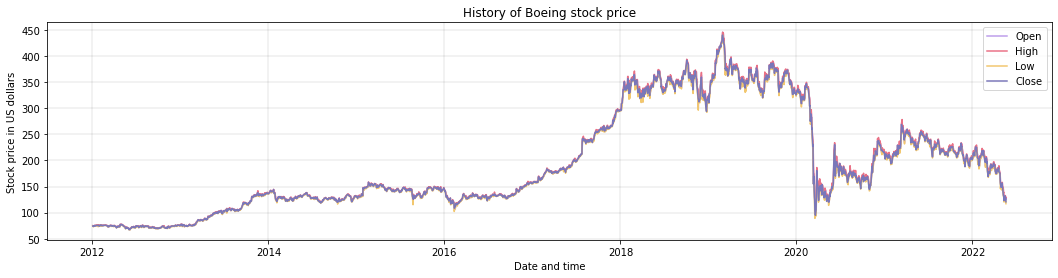

In [13]:
plt.figure(figsize = (18, 4))
plt.title("History of Boeing stock price")
for price, color in zip(prices, colors):
    plt.plot(dataset_d.index, dataset_d[price], color = color)
plt.xlabel("Date and time")
plt.ylabel("Stock price in US dollars")
plt.legend(prices)
plt.grid(linewidth = 0.1, color = "#000000")
plt.show()

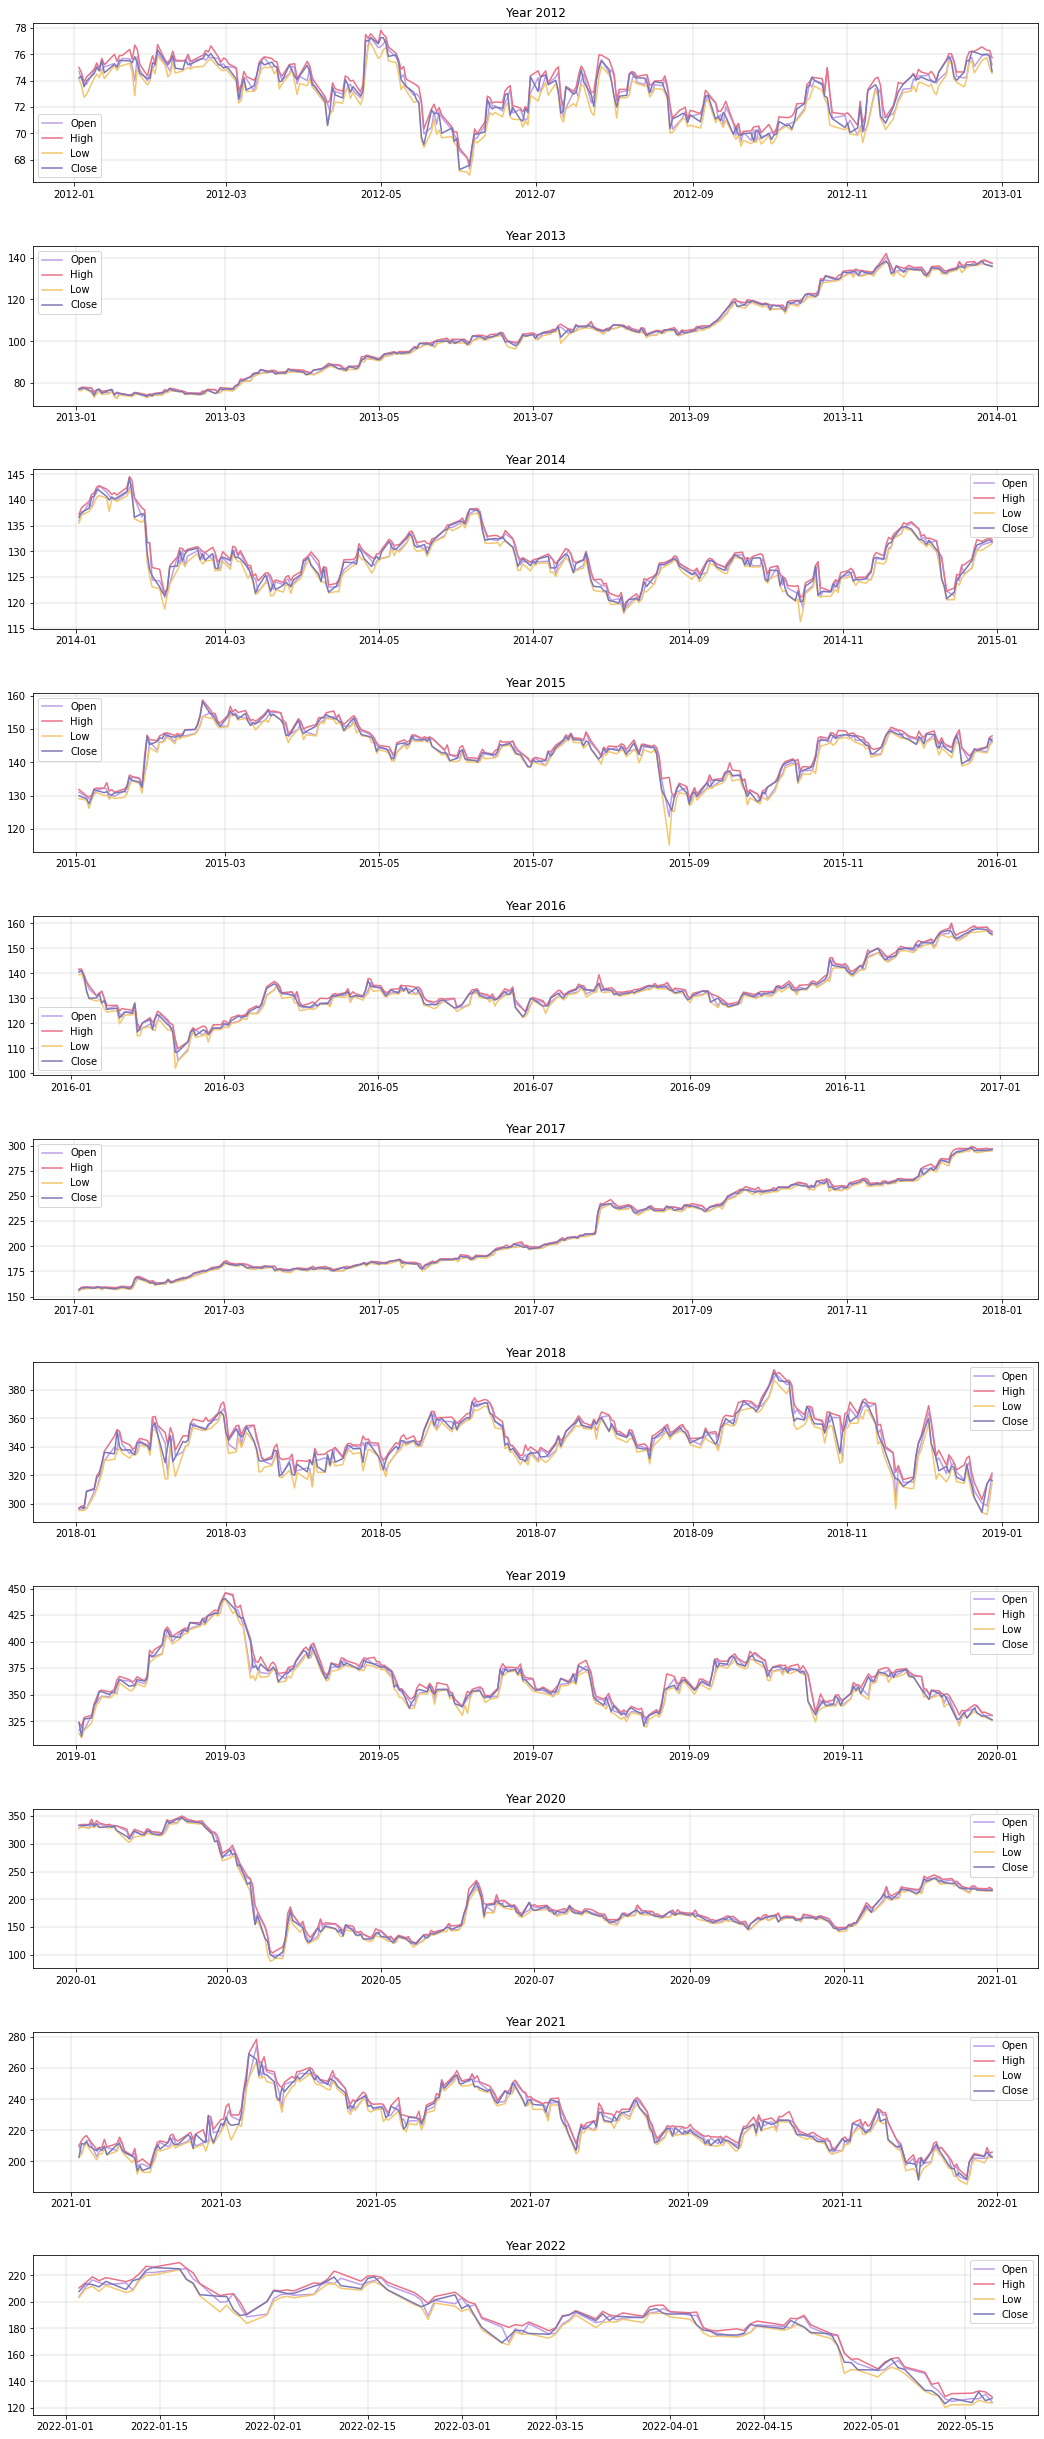

In [14]:
# Create graphs for annual stock price changes

n_m = len(dataset_d.groupby([dataset_d.index.year]))
range_start = 0
i_m = 0
fig, axes = plt.subplots(n_m , 1, figsize = (18, 4 * n_m))
fig.subplots_adjust(hspace = 0.4)
for i in range(len(dataset_d)):
    if i == 0:
        continue
    elif dataset_d.index.year[i] != dataset_d.index.year[i-1]:
        for price, color in zip(prices, colors):
            axes[i_m].plot(dataset_d.index[range_start : i - 1], dataset_d[price][range_start : i - 1], color = color)
        axes[i_m].set_title('Year ' + str(dataset_d.index[i-1].year))
        axes[i_m].grid(linewidth = 0.1, color = "#000000")
        axes[i_m].legend(prices)
        range_start = i
        i_m += 1
    elif i == len(dataset_d) - 1:
        for (price, color) in zip(prices, colors):
            axes[i_m].plot(dataset_d.index[range_start : i], dataset_d[price][range_start : i], color = color)
        axes[i_m].set_title('Year ' + str(dataset_d.index[i-1].year))
        axes[i_m].grid(linewidth = 0.1, color = "#000000")
        axes[i_m].legend(prices)
plt.show()

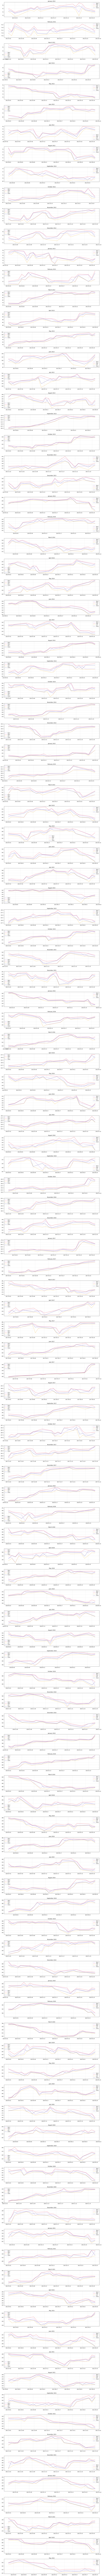

In [15]:
# Create graphs for monthly stock price changes

n_m = len(dataset_d.groupby([dataset_d.index.year, dataset_d.index.month]))
range_start = 0
i_m = 0
fig, axes = plt.subplots(n_m , 1, figsize = (18, 4 * n_m))
fig.subplots_adjust(hspace = 0.4)
for i in range(len(dataset_d)):
    if i == 0:
        continue
    elif dataset_d.index.month[i] != dataset_d.index.month[i-1]:
        for price, color in zip(prices, colors):
            axes[i_m].plot(dataset_d.index[range_start : i - 1], dataset_d[price][range_start : i - 1], color = color)
        axes[i_m].set_title(str(dataset_d.index[i-1].month_name()) + ' ' + str(dataset_d.index[i-1].year))
        axes[i_m].grid(linewidth = 0.1, color = "#000000")
        axes[i_m].legend(prices)
        range_start = i
        i_m += 1
    elif i == len(dataset_d) - 1:
        for price, color in zip(prices, colors):
            axes[i_m].plot(dataset_d.index[range_start : i], dataset_d[price][range_start : i], color = color)
        axes[i_m].set_title(str(dataset_d.index[i-1].month_name()) + ' ' + str(dataset_d.index[i-1].year))
        axes[i_m].grid(linewidth = 0.1, color = "#000000")
        axes[i_m].legend(prices)
plt.show()

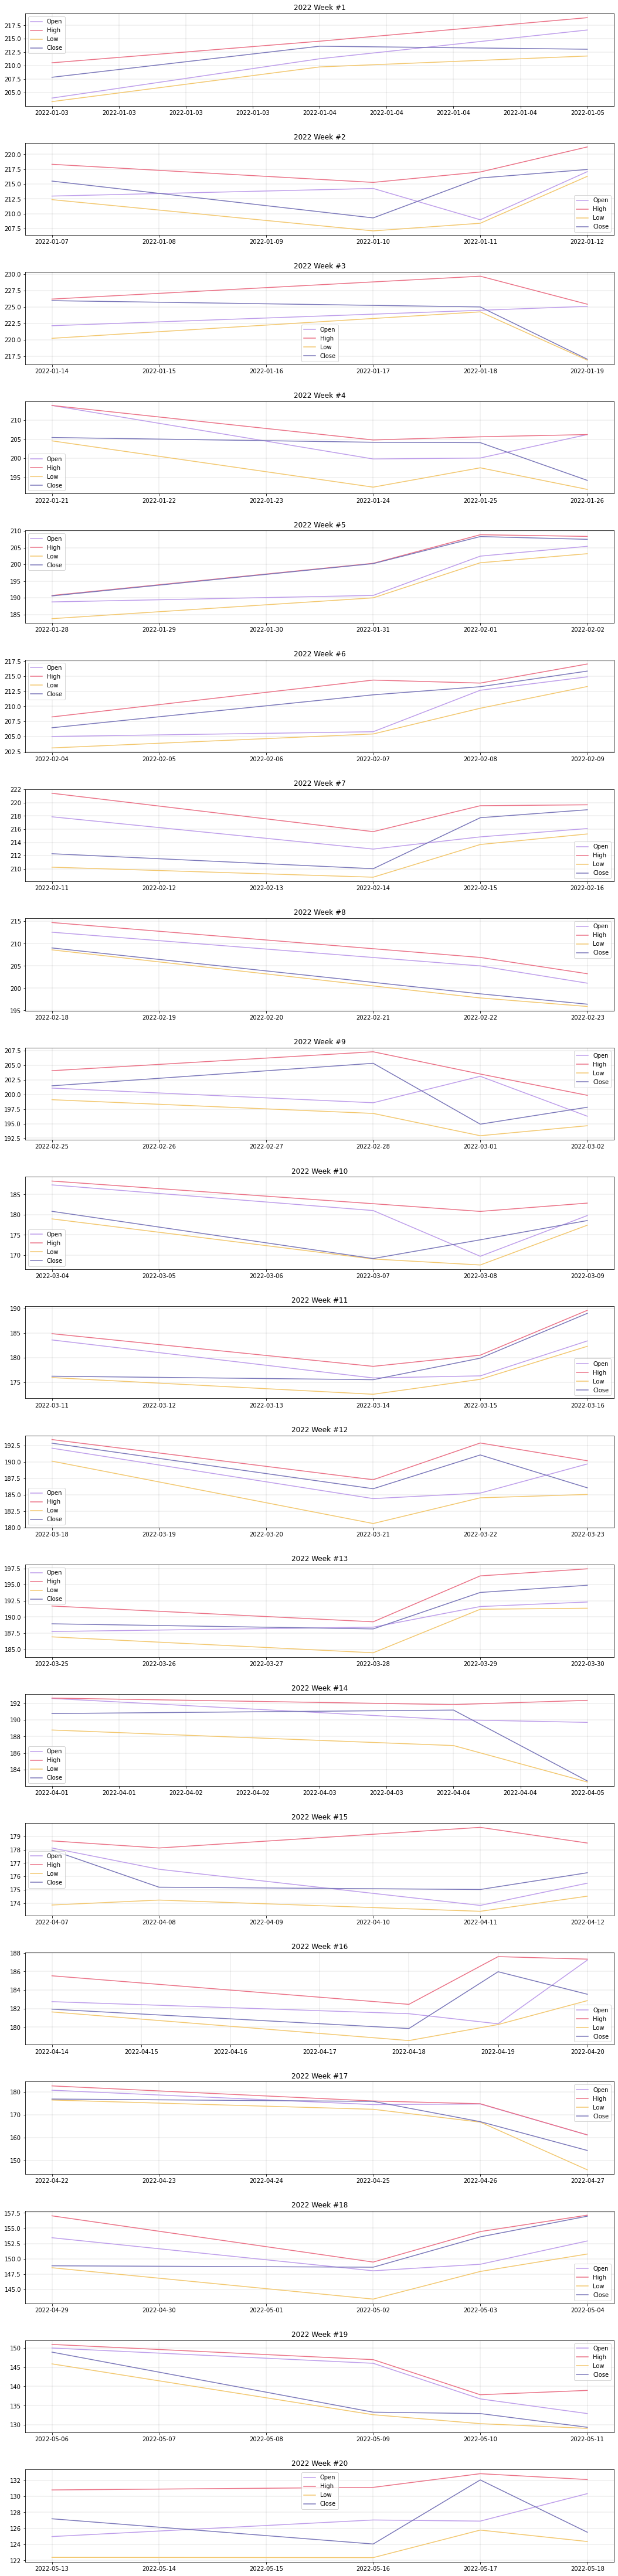

In [28]:
# Create graphs for weekly stock price changes in current year

current_year = dataset_d[dataset_d.index.year == 2022]
n_w = len(current_year.groupby(current_year.index.isocalendar().week))
range_start = 0
i_w = 0
fig, axes = plt.subplots(n_w, 1, figsize = (18, 4 * n_w))
fig.subplots_adjust(hspace=0.4)
for i in range(len(current_year)):
    if i == 0:
        continue
    elif dataset_d.index.isocalendar().week[i] != dataset_d.index.isocalendar().week[i-1]:
        for price, color in zip(prices, colors):
            axes[i_w].plot(current_year.index[range_start : i - 1], current_year[price][range_start : i - 1], color = color)
        axes[i_w].set_title(str(current_year.index[i-1].year) + ' Week #' + str(current_year.index[i-1].isocalendar().week))
        axes[i_w].grid(linewidth = 0.1, color = "#000000")
        axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[i_w].legend(prices)
        range_start = i
        i_w += 1
    elif i == len(current_year) - 1:
        for price, color in zip(prices, colors):
            axes[i_w].plot(current_year.index[range_start : i - 1], current_year[price][range_start : i - 1], color = color)
        axes[i_w].set_title(str(current_year.index[i-1].year) + ' Week #' + str(current_year.index[i-1].isocalendar().week))
        axes[i_w].grid(linewidth = 0.1, color = "#000000")
        axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[i_w].legend(prices)
plt.show()